# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


顔検出が面内回転に対してどれくらい頑強かを評価する。

データベースによっては既に目位置を正規化してあり、
面内回転を加えたデータで評価してはじめて、実際環境での顔検出能力を評価できる。

そこで、このスクリプトでは、データに面内回転を加えた画像を作って
検出率を評価している。


In [5]:
%matplotlib inline
import pandas as pd
import os

In [19]:

import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
names.sort()


scales = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]


In [20]:
# names = names[:50]

scales = scales[:3]

In [21]:
import tfFaceDetector as faceDetector
for scale in scales:
    faceDetector.processDatabase(dataset, names, scale=scale)

# headPose dataset の検出処理後のデータ解析

In [22]:
dfs={}
deg = 0
for scale in scales:
    dfs[scale] = pd.read_csv("log_%s_%d_%f.csv" % (dataset, deg, scale))
    print scale, dfs[scale]["truePositives"].mean()

1.0 0.8458781362007168
0.9 0.8681003584229391
0.8 0.8985663082437276


In [ ]:
rates = [dfs[scale]["truePositives"].mean() for scale in scales]
falseRates = [dfs[scale]["falsePositives"].mean() for scale in scales]
data = {"scales":scales, "rates":rates, "falseRates":falseRates}
df = pd.DataFrame(data, columns=["scales", "rates", "falseRates"])

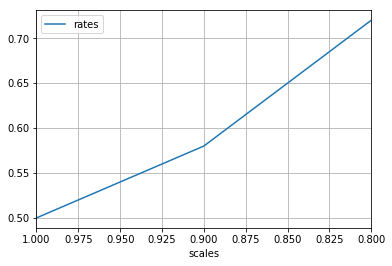

In [18]:
df.plot(x="scales", y="rates", grid=True)

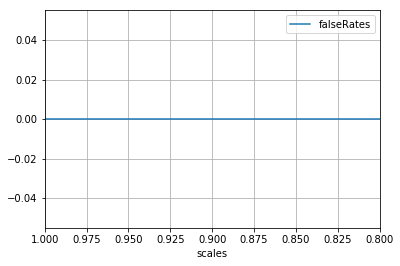

In [12]:
df.plot(x="scales", y="falseRates", grid=True)